# Week 2 Problem Set

## Part 1

### Problem 1

In [8]:
#Import some packages

import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import linalg as linalg
from numpy import linalg as LA
from numpy import random as rand
from numba import vectorize, jit, njit, float64, prange

In [9]:
#Import the data

matrix = np.loadtxt('matrix_data.txt')

#### Find the maximum eigenvalue using scipy

In [23]:
evals = abs(linalg.eig(matrix)[0])
max_eig=np.max(evals)
print(max_eig)


1.0044277694480632


#### Iterate to the maximum eigenvalue

In [58]:
ones = np.ones(10) #create a non-zero vector

max_iter = 10000 #number of iterations we want
store = np.zeros(max_iter) #initialise matrix to store output

for i in range(1, max_iter + 1 , 1):
    A = np.transpose(np.matmul(LA.matrix_power(matrix, i), ones))
    B = np.matmul(LA.matrix_power(matrix, i), ones)
    C = np.matmul(A, B)
    D = C**(1/i)
    store[i-1] = D
       
print(store[max_iter-1])


1.0091163184636458


<Figure size 432x288 with 0 Axes>

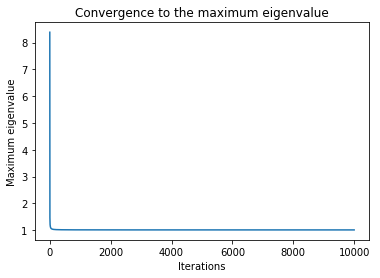

In [56]:
#Plot

plt.figure()
fig, ax = plt.subplots()
ax.plot(store[:])
plt.xlabel('Iterations')
plt.ylabel('Maximum eigenvalue')
plt.title('Convergence to the maximum eigenvalue')
plt.show()

### Problem 2

In [10]:
#Define the quad function

@jit
def quad():
    n=100000 #set number of points we want
    x=np.empty(n) # initialise x
    x[0] = rand.uniform(0,1) #Initialise some x0
    for t in range(n-1):
        x[t+1] = 4*x[t]*(1 - x[t])
    return x


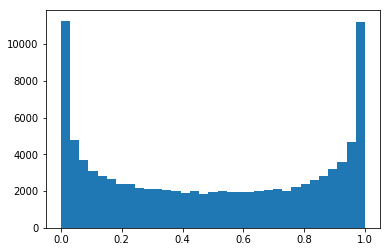

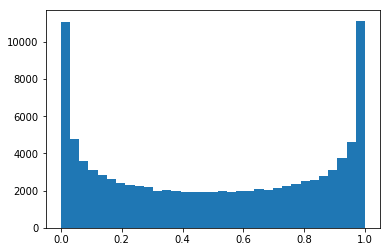

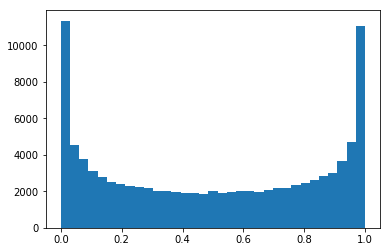

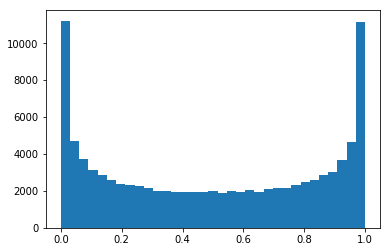

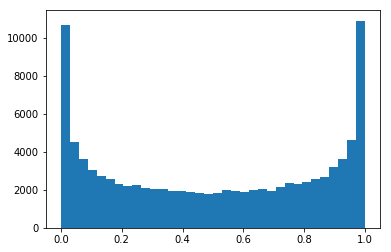

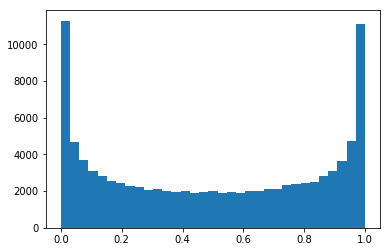

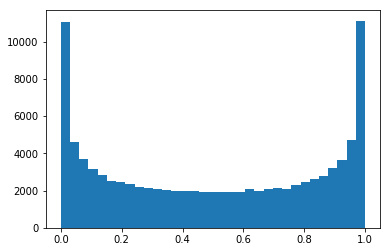

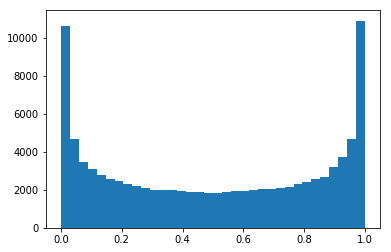

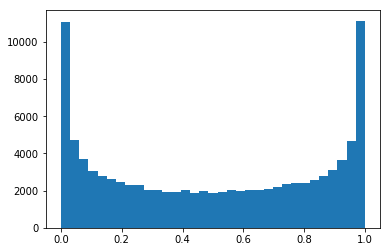

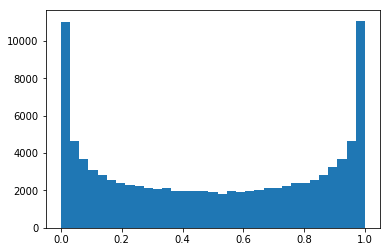

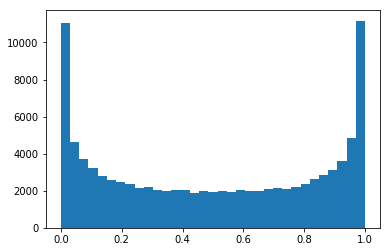

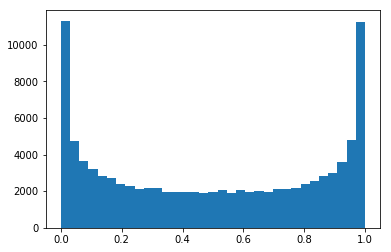

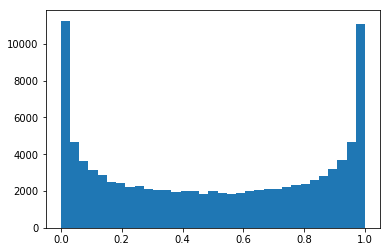

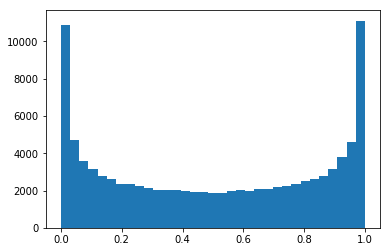

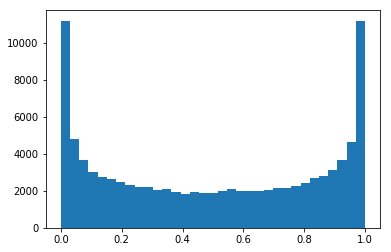

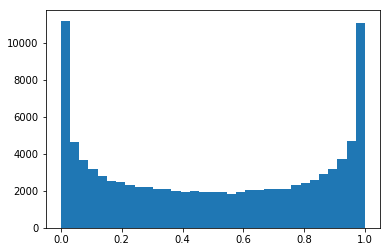

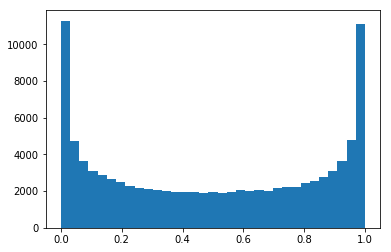

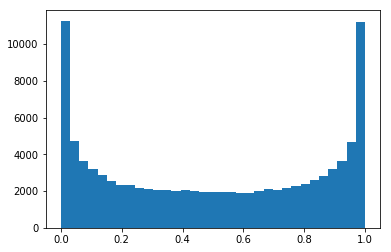

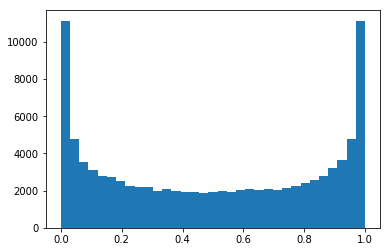

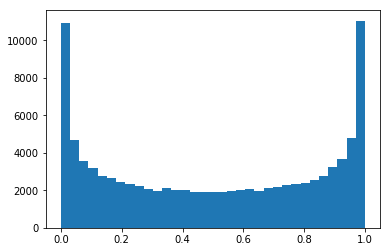

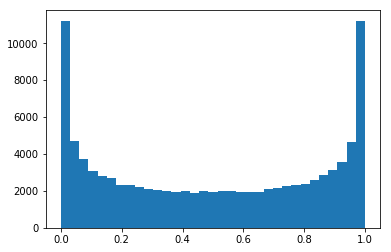

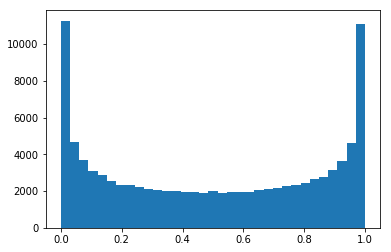

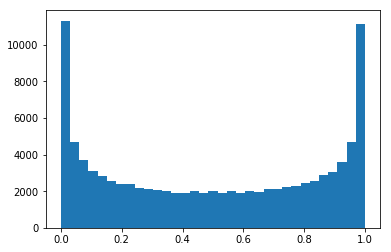

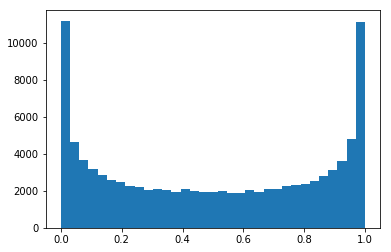

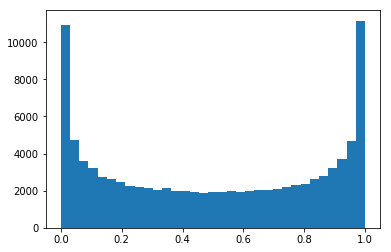

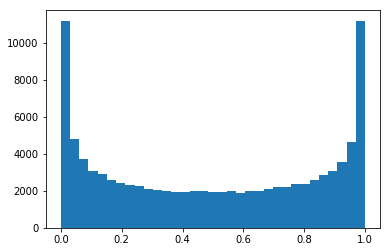

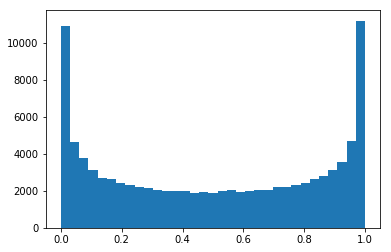

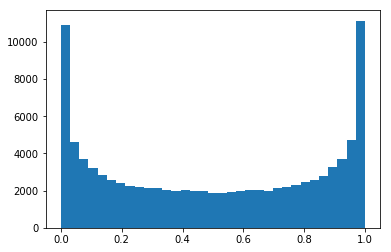

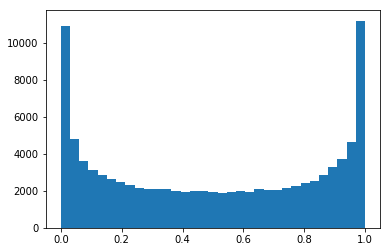

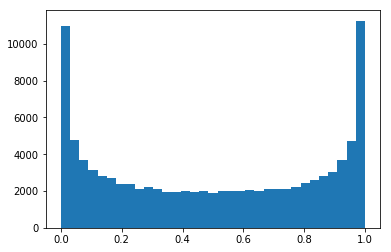

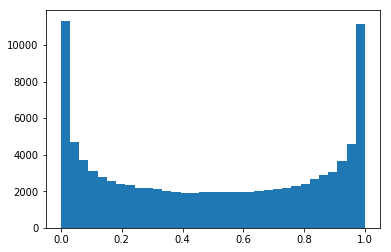

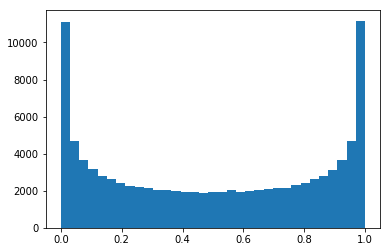

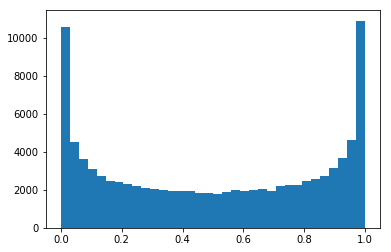

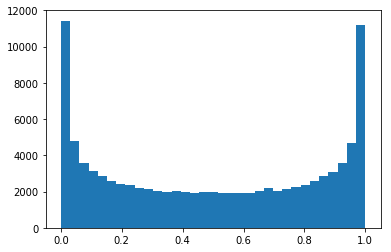

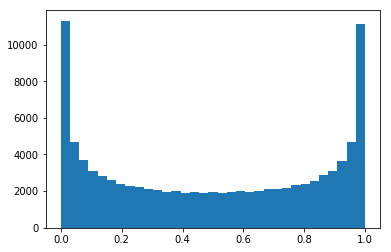

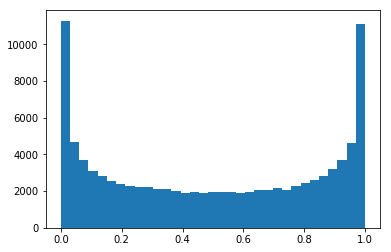

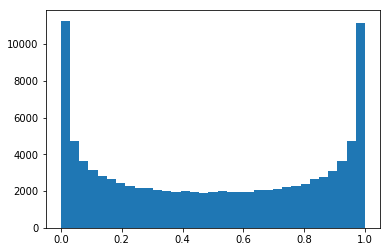

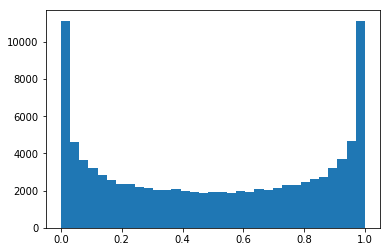

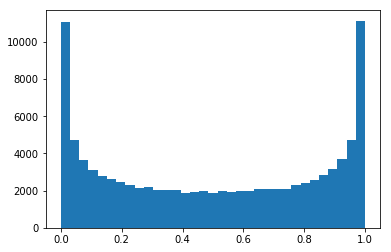

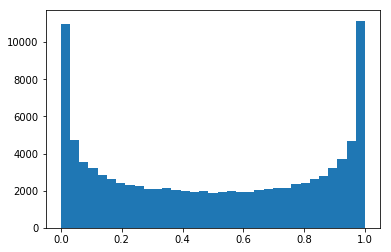

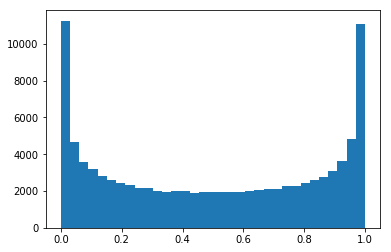

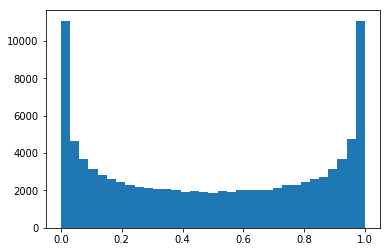

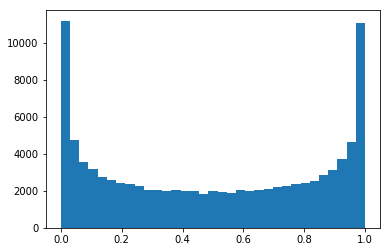

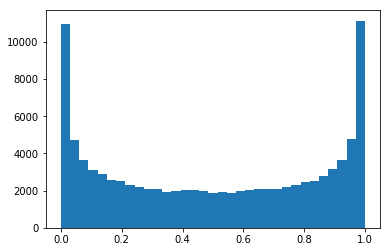

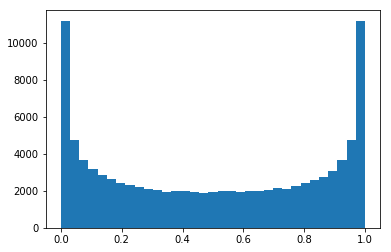

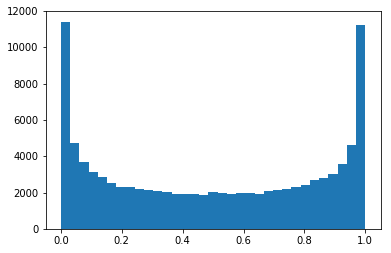

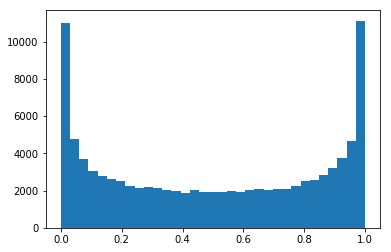

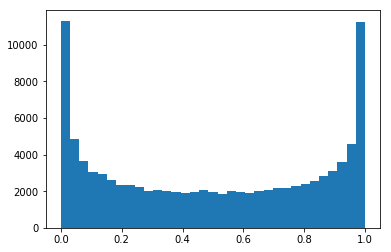

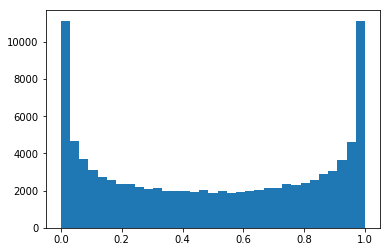

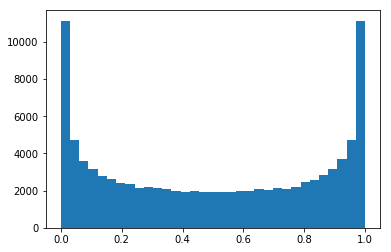

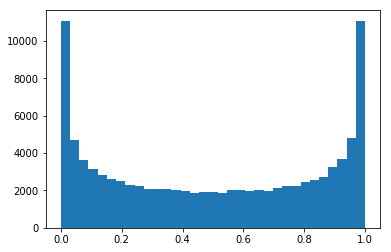

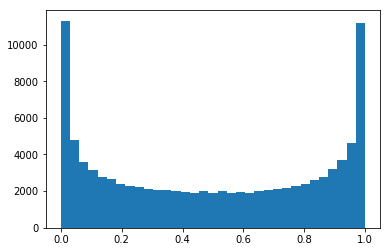

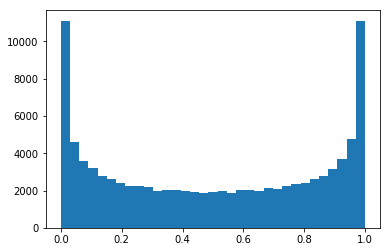

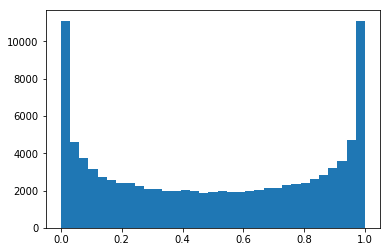

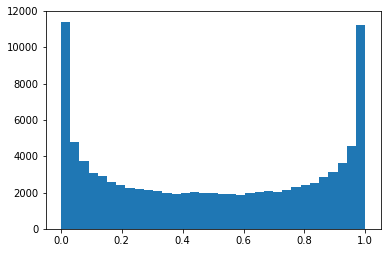

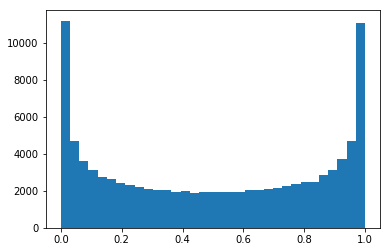

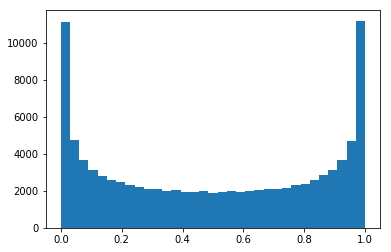

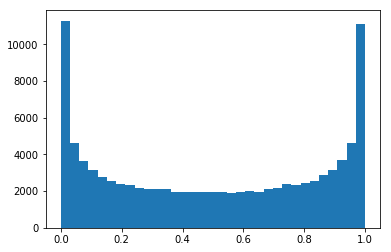

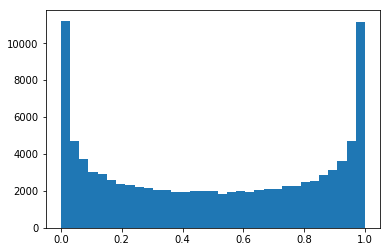

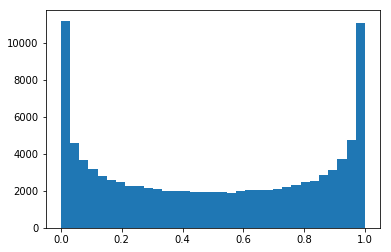

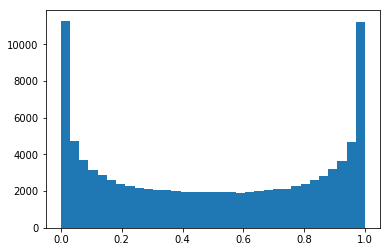

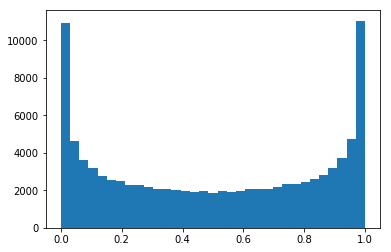

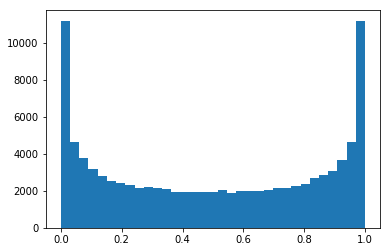

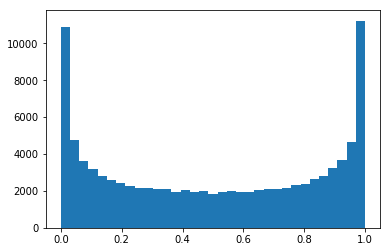

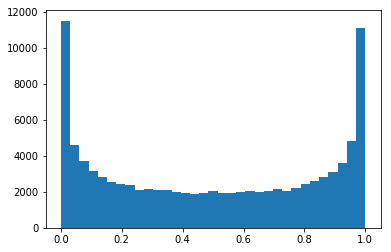

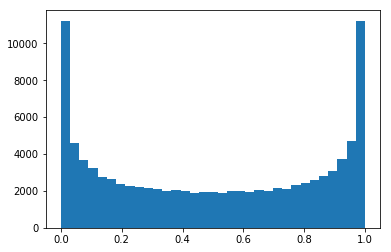

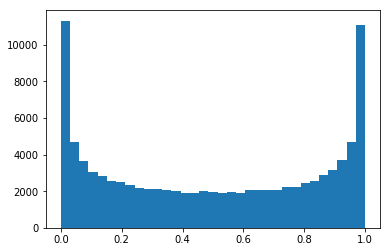

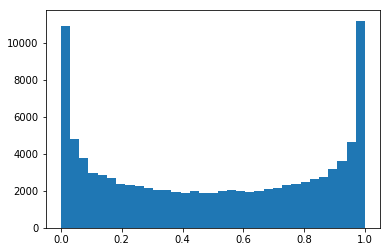

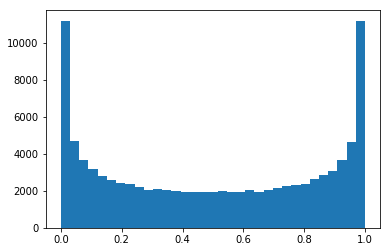

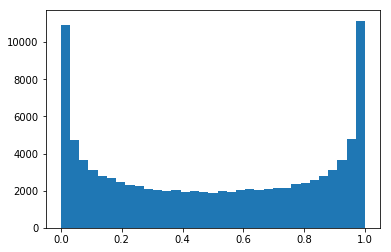

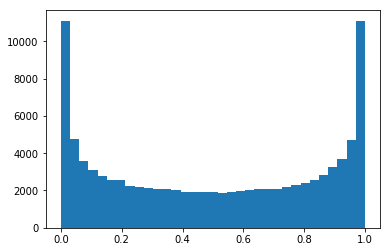

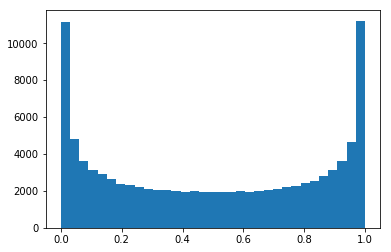

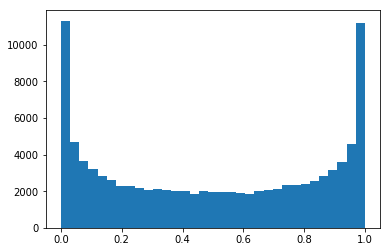

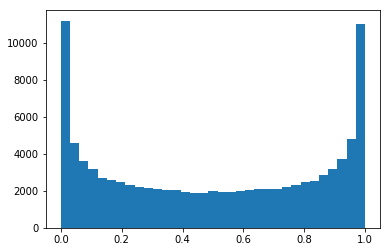

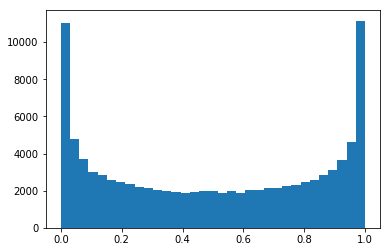

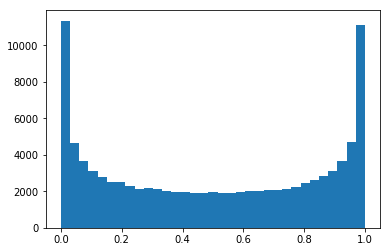

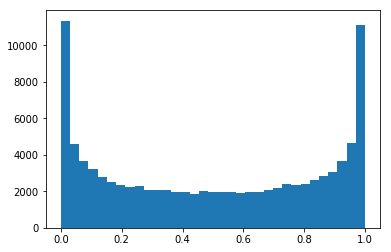

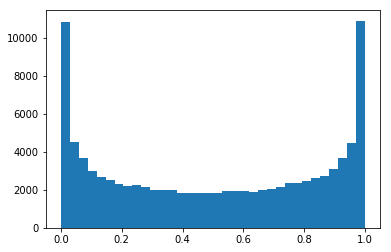

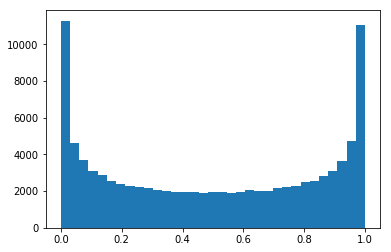

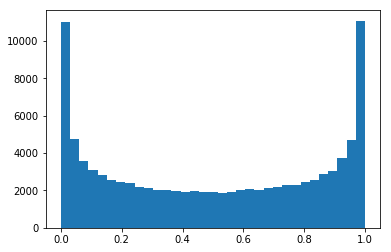

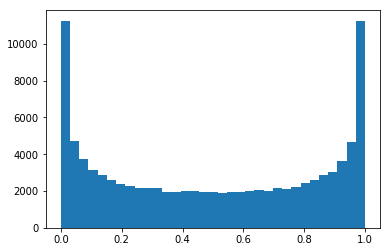

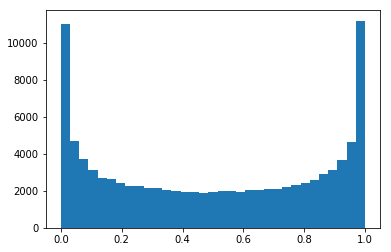

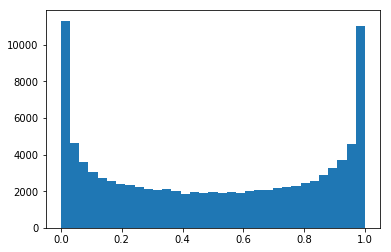

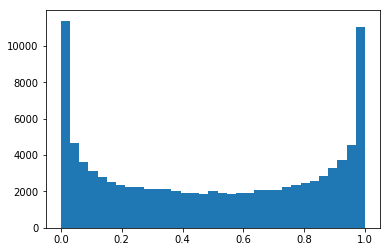

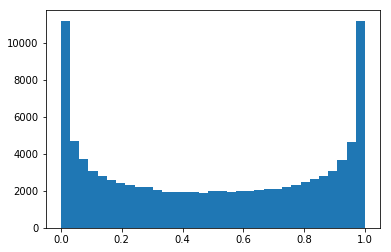

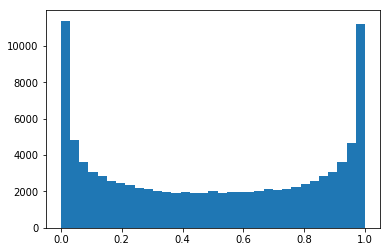

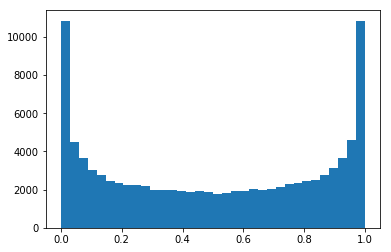

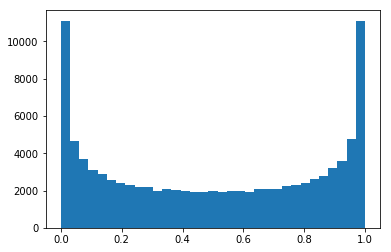

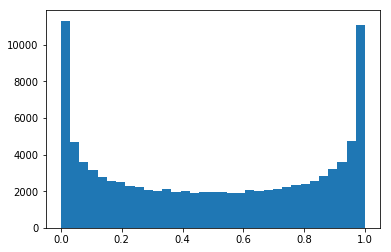

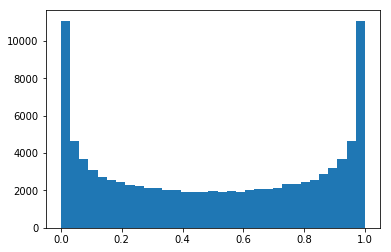

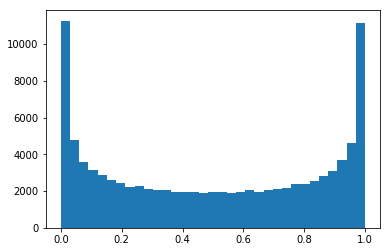

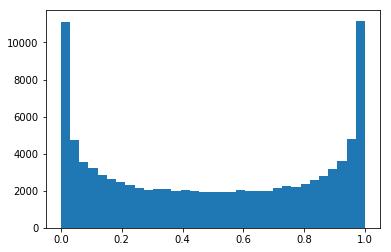

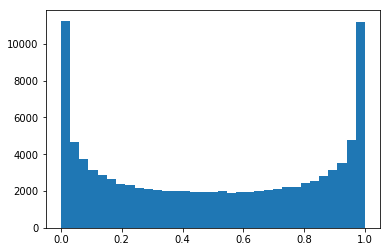

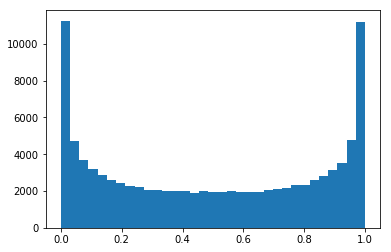

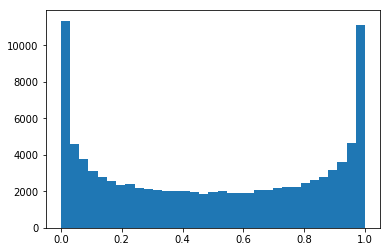

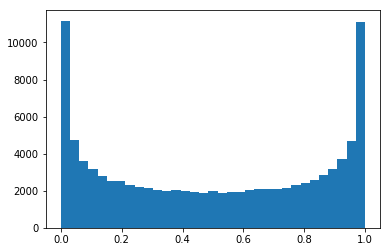

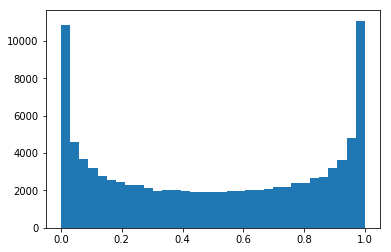

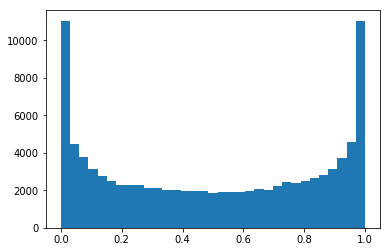

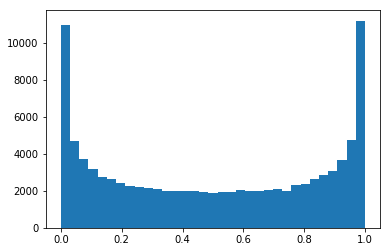

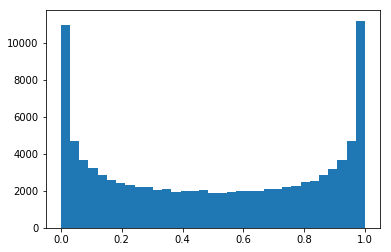

In [11]:
#Do the quad  function 100 times

for i in range(100):
    x = quad()
    plt.hist(x, bins='auto')
    plt.show()


### Exercise 3

We know that $\lim_{t\to\infty}g^{t}(x) = \hat x$
And similarly $\lim_{t\to\infty}g^{t-1}(x) = \hat x$

Since $g$ is continuous at $\hat x \in \mathbb X$ then we know that:

$\lim_{t\to\infty}g^{t}(x) = g(\lim_{t\to\infty}g^{t-1}(x))$

From the first two lines, we can rewrite the right hand side of the above equation as $g(\hat x)$ and the left hand side as $\hat x$.

Thus we have:

$g(\hat x) = \hat x$ and the proposition is proved.

## Part 2

### Exercise 1

In [108]:
from scipy.stats import norm
from scipy.stats import beta
import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt

In [100]:
class Kernelde(object):

    def __init__(self, X, h = None):
        self.X = X
        self.n = len(X)
        self.var = np.var(X)
        
        if not h:
            self.h = 1.06*((np.var(X))**0.5)*(len(X))**(-0.2)
        else:
            self.h = h
     
    def f(self, x):
        y = np.zeros(len(x))
               
        for j in range(len(x)):
            z = np.zeros(len(self.X))
            
            for i in range(len(self.X)):
                z[i] = norm.pdf((x[j] - self.X[i])/self.h)
            
            y[j] = (1/(self.h*self.n))*(np.sum(z))

        return y


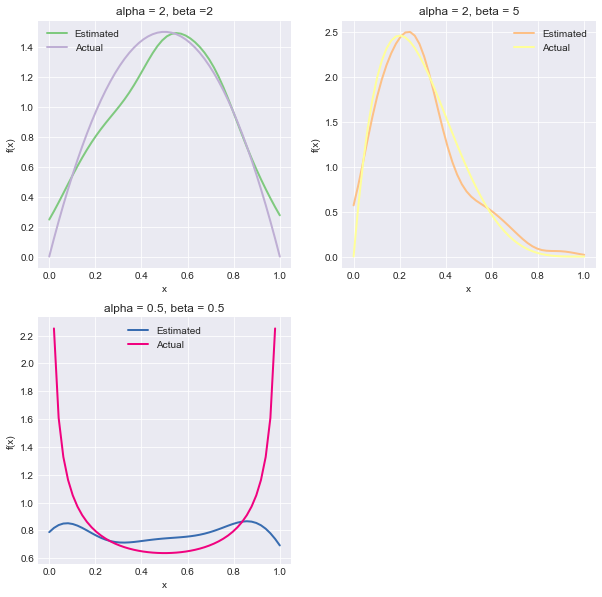

In [119]:
#Test using the Beta distribution

X_1 = rand.beta(2, 2, size=(100, 1))
X_2 = rand.beta(2, 5, size=(100, 1))
X_3 = rand.beta(0.5, 0.5, size=(100, 1))

x = np.linspace(0, 1, 50)

dist_1 = Kernelde(X_1)
dist_2 = Kernelde(X_2)
dist_3 = Kernelde(X_3)

line_1 = dist_1.f(x)
line_2 = dist_2.f(x)
line_3 = dist_3.f(x)

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Accent')

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.plot(x, line_1, color=palette(0), linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 2), color=palette(1), linewidth=2.0)
plt.legend(['Estimated', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('alpha = 2, beta =2')

plt.subplot(2,2,2)
plt.plot(x, line_2, color=palette(2), linewidth=2.0)
plt.plot(x, beta.pdf(x, 2, 5), color=palette(3), linewidth=2.0)
plt.legend(['Estimated', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('alpha = 2, beta = 5')

plt.subplot(2,2,3)
plt.plot(x, line_3, color=palette(4), linewidth=2.0)
plt.plot(x, beta.pdf(x, 0.5, 0.5), color=palette(5), linewidth=2.0)
plt.legend(['Estimated', 'Actual'])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('alpha = 0.5, beta = 0.5')

plt.show()

### Exercise 2

In [120]:
#Initialise the parameters

rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

In [154]:
#PLot the true distributions

x = np.linspace(-6, 0, 1000)

#Generate simulation

def sim(n):
    X_t = np.zeros(n)
    X_t = rand.normal(mu, s, n) #generate some draws from intial distribution
    e_t_1 = rand.normal(0, 1, n) #generate some shocks
    X_t_1 = np.zeros(n)
    X_t_1 = rho*X_t + b + sigma*e_t_1 #update to new distribution
    estim = Kernelde(X_t_1) #estimate kernel density
    pdf = estim.f(x) #find estimated pdf
    return pdf

sim_5 = sim(5)
sim_10 = sim(10)
sim_100 = sim(100)
#sim_1000 = sim(1000)



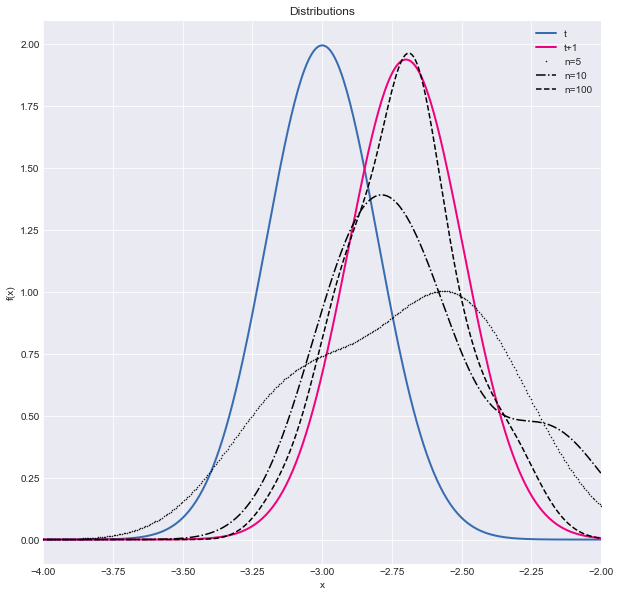

In [155]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Accent')

plt.figure(figsize=(10, 10))

plt.subplot(1, 1, 1)
plt.plot(x, norm.pdf(x, mu, s), color=palette(4), linewidth=2.0)
plt.plot(x, norm.pdf(x, rho*mu + b, ((rho**2)*(s**2) + sigma**2)**0.5), color=palette(5), linewidth = 2.0)

plt.plot(x, sim_5, 'k.', markersize = 1)
plt.plot(x, sim_10, 'k-.', markersize = 1 )
plt.plot(x, sim_100, 'k--', markersize = 1)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['t', 't+1', 'n=5', 'n=10', 'n=100'])
plt.title('Distributions')
plt.xlim(-4, -2)

plt.show()

### Problem 3

Gelfand's formula says that $||A^k||^{1/k} \to r(A)$.

We note that by the continuous mapping theorem we can rearrange this to: $||A^k|| \to r(A)^{k}$

Then since we are told that $r(A) < 1$, we can write: $lim_{k \to \infty}||A^k|| = 0$